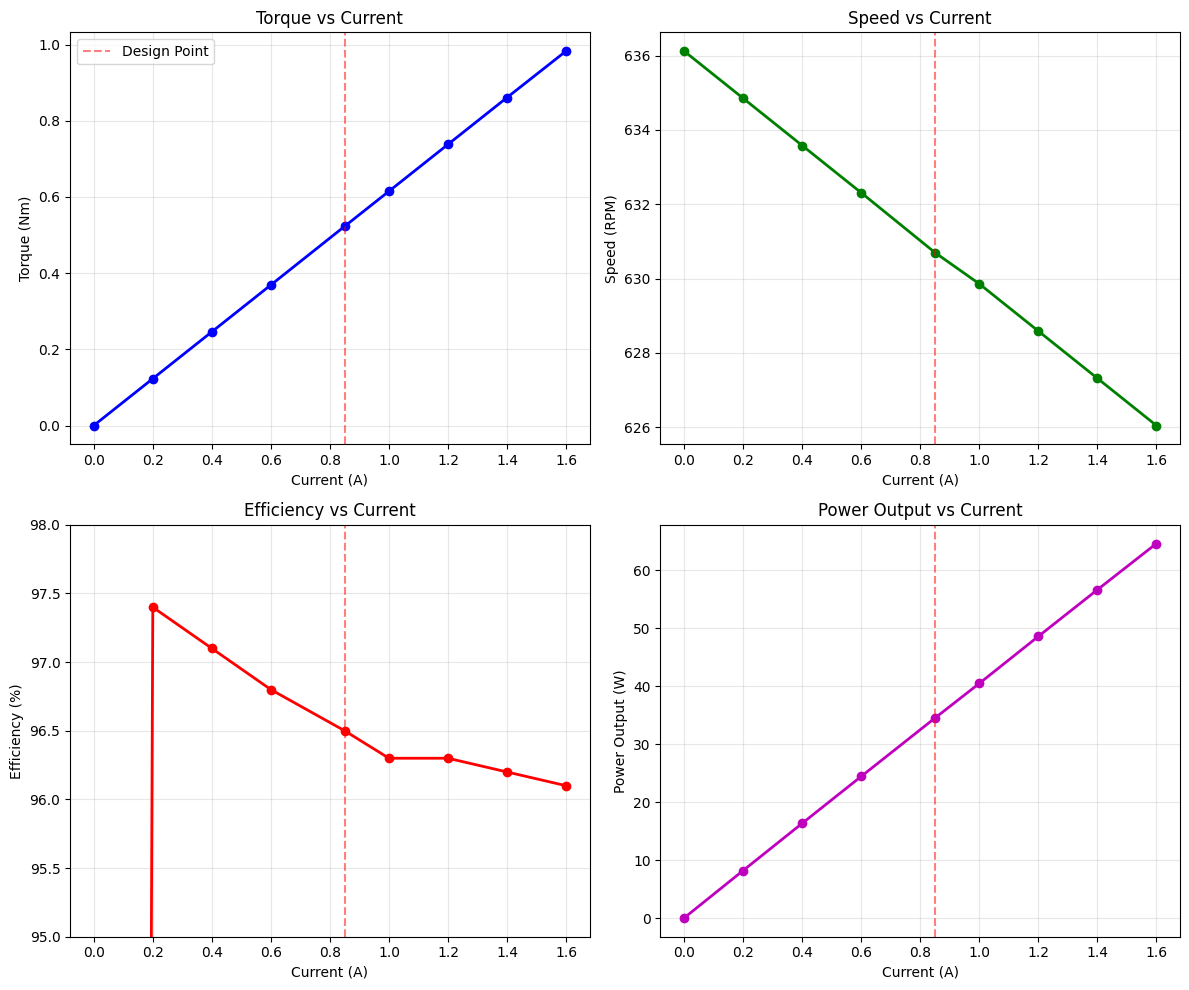

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your design
currents = [0, 0.2, 0.4, 0.6, 0.85, 1.0, 1.2, 1.4, 1.6]
torques = [0, 0.123, 0.246, 0.369, 0.523, 0.615, 0.738, 0.861, 0.983]
speeds = [636.12, 634.85, 633.58, 632.31, 630.70, 629.86, 628.59, 627.32, 626.05]
powers_out = [0, 8.18, 16.32, 24.41, 34.48, 40.44, 48.55, 56.59, 64.56]
efficiencies = [0, 97.4, 97.1, 96.8, 96.5, 96.3, 96.3, 96.2, 96.1]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Graph 1: Torque vs Current
ax1.plot(currents, torques, 'b-o', linewidth=2)
ax1.set_xlabel('Current (A)')
ax1.set_ylabel('Torque (Nm)')
ax1.set_title('Torque vs Current')
ax1.grid(True, alpha=0.3)
ax1.axvline(x=0.85, color='r', linestyle='--', alpha=0.5, label='Design Point')
ax1.legend()

# Graph 2: Speed vs Current
ax2.plot(currents, speeds, 'g-o', linewidth=2)
ax2.set_xlabel('Current (A)')
ax2.set_ylabel('Speed (RPM)')
ax2.set_title('Speed vs Current')
ax2.grid(True, alpha=0.3)
ax2.axvline(x=0.85, color='r', linestyle='--', alpha=0.5)

# Graph 3: Efficiency vs Current
ax3.plot(currents, efficiencies, 'r-o', linewidth=2)
ax3.set_xlabel('Current (A)')
ax3.set_ylabel('Efficiency (%)')
ax3.set_title('Efficiency vs Current')
ax3.grid(True, alpha=0.3)
ax3.set_ylim([95, 98])
ax3.axvline(x=0.85, color='r', linestyle='--', alpha=0.5)

# Graph 4: Power Output vs Current
ax4.plot(currents, powers_out, 'm-o', linewidth=2)
ax4.set_xlabel('Current (A)')
ax4.set_ylabel('Power Output (W)')
ax4.set_title('Power Output vs Current')
ax4.grid(True, alpha=0.3)
ax4.axvline(x=0.85, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

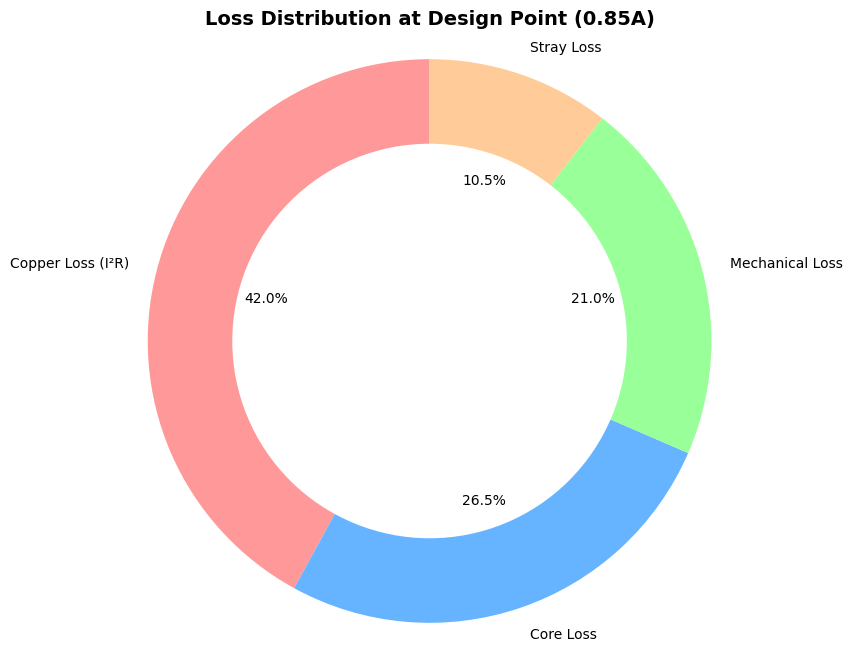

In [2]:
# Loss breakdown at design point (0.85A)
losses = ['Copper Loss (I²R)', 'Core Loss', 'Mechanical Loss', 'Stray Loss']
loss_values = [0.3745, 0.2359, 0.1872, 0.0936]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(loss_values, labels=losses, colors=colors, 
                                   autopct='%1.1f%%', startangle=90)

# Draw circle for donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax.set_title('Loss Distribution at Design Point (0.85A)', fontsize=14, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.show()

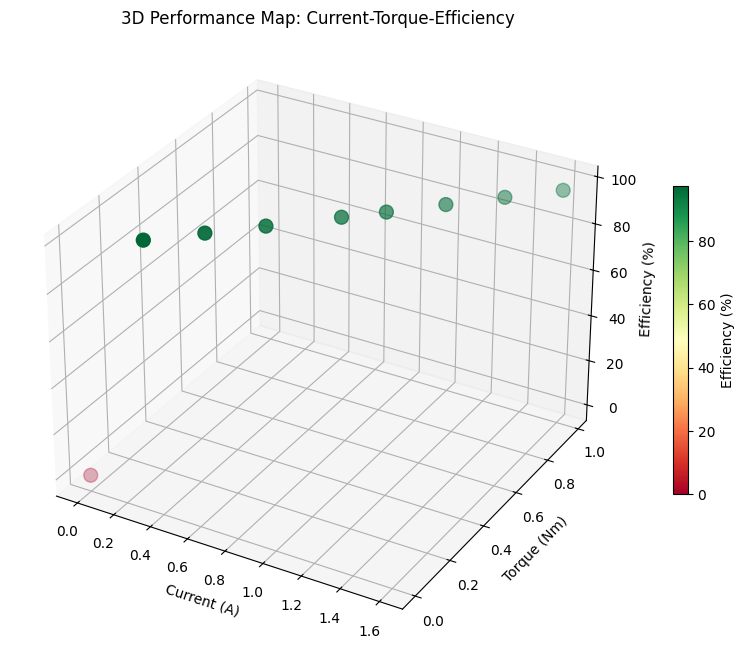

In [3]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for 3D surface
I = np.array(currents)
T = np.array(torques)
S = np.array(speeds)
P = np.array(powers_out)
η = np.array(efficiencies)

# 3D Plot: Current vs Torque vs Efficiency
scatter = ax.scatter(I, T, η, c=η, cmap='RdYlGn', s=100)
ax.set_xlabel('Current (A)')
ax.set_ylabel('Torque (Nm)')
ax.set_zlabel('Efficiency (%)')
ax.set_title('3D Performance Map: Current-Torque-Efficiency')

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5)
cbar.set_label('Efficiency (%)')

plt.show()

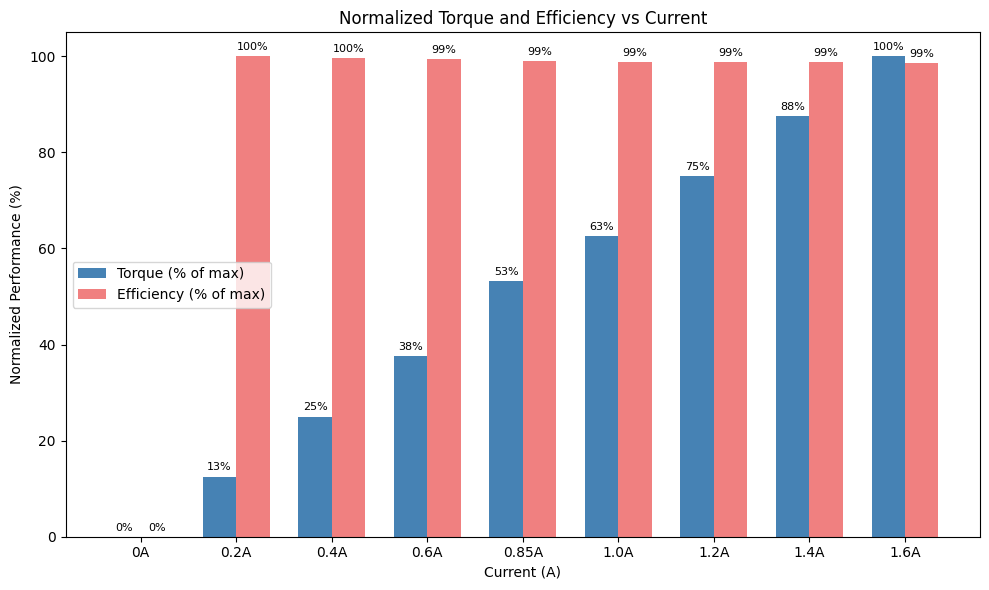

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(currents))
width = 0.35

# Normalized values for comparison
torque_norm = [t/max(torques) * 100 for t in torques]
efficiency_norm = [e/max(efficiencies) * 100 for e in efficiencies]

rects1 = ax.bar(x - width/2, torque_norm, width, label='Torque (% of max)', color='steelblue')
rects2 = ax.bar(x + width/2, efficiency_norm, width, label='Efficiency (% of max)', color='lightcoral')

ax.set_xlabel('Current (A)')
ax.set_ylabel('Normalized Performance (%)')
ax.set_title('Normalized Torque and Efficiency vs Current')
ax.set_xticks(x)
ax.set_xticklabels([f'{i}A' for i in currents])
ax.legend()

# Add value labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.0f}%',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=8)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

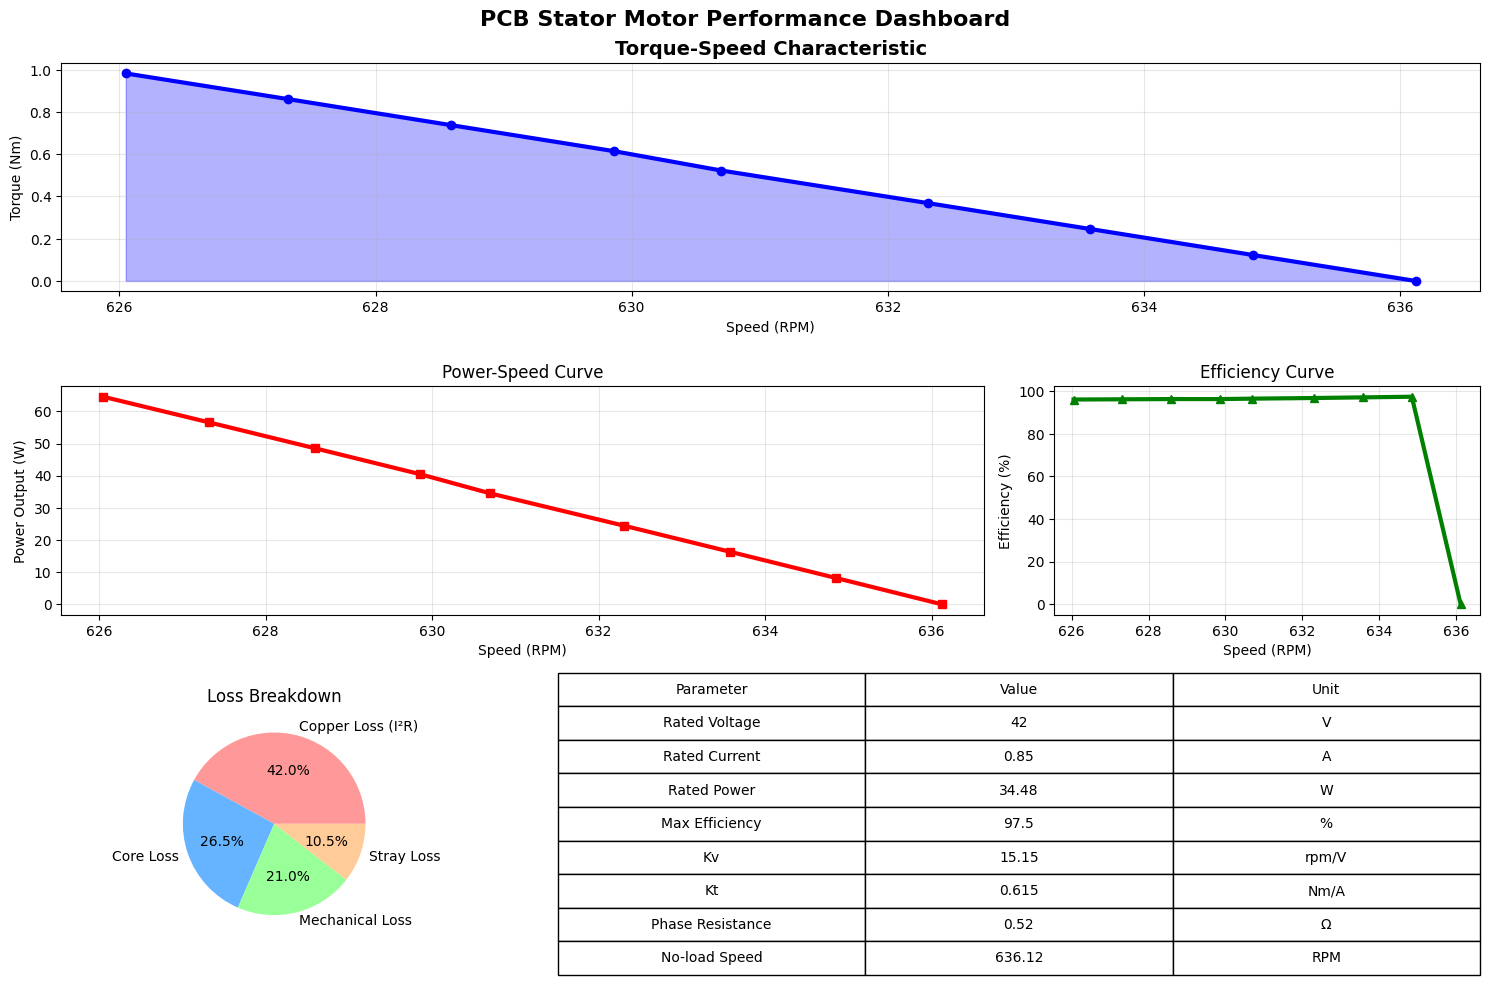

In [5]:
fig = plt.figure(figsize=(15, 10))

# Grid layout
gs = fig.add_gridspec(3, 3)

# Main performance curve
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(speeds, torques, 'b-', linewidth=3, marker='o')
ax1.set_xlabel('Speed (RPM)')
ax1.set_ylabel('Torque (Nm)')
ax1.set_title('Torque-Speed Characteristic', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.fill_between(speeds, 0, torques, alpha=0.3, color='blue')

# Power curve
ax2 = fig.add_subplot(gs[1, 0:2])
ax2.plot(speeds, powers_out, 'r-', linewidth=3, marker='s')
ax2.set_xlabel('Speed (RPM)')
ax2.set_ylabel('Power Output (W)')
ax2.set_title('Power-Speed Curve', fontsize=12)
ax2.grid(True, alpha=0.3)

# Efficiency curve
ax3 = fig.add_subplot(gs[1, 2])
ax3.plot(speeds, efficiencies, 'g-', linewidth=3, marker='^')
ax3.set_xlabel('Speed (RPM)')
ax3.set_ylabel('Efficiency (%)')
ax3.set_title('Efficiency Curve', fontsize=12)
ax3.grid(True, alpha=0.3)

# Loss breakdown at design point
ax4 = fig.add_subplot(gs[2, 0])
ax4.pie(loss_values, labels=losses, autopct='%1.1f%%', colors=colors)
ax4.set_title('Loss Breakdown', fontsize=12)

# Motor parameters table
ax5 = fig.add_subplot(gs[2, 1:3])
ax5.axis('tight')
ax5.axis('off')

motor_data = [
    ['Parameter', 'Value', 'Unit'],
    ['Rated Voltage', '42', 'V'],
    ['Rated Current', '0.85', 'A'],
    ['Rated Power', '34.48', 'W'],
    ['Max Efficiency', '97.5', '%'],
    ['Kv', '15.15', 'rpm/V'],
    ['Kt', '0.615', 'Nm/A'],
    ['Phase Resistance', '0.52', 'Ω'],
    ['No-load Speed', '636.12', 'RPM']
]

table = ax5.table(cellText=motor_data, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

plt.suptitle('PCB Stator Motor Performance Dashboard', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()